# Imports

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import leafmap  # Helps with the colorbar plot. Builds on top of ipyleaflet
from typing import List

from ipyleaflet import (
    basemaps,
    Marker,
    FullScreenControl,
    AwesomeIcon,
)

from tqdm import tqdm
tqdm.pandas()

from climate_resilience import utils
from climate_resilience import visualize as viz

# Access Data

In [2]:
datadir = "/global/scratch/satyarth/Projects/lbnl-climate-resilience/data"
pr_csv_path = os.path.join(datadir, "LMsites_pr1.csv")
df_pr = pd.read_csv(pr_csv_path)
df_pr

,Unnamed: 0,Unnamed: 0.1,OBJECTID,ID,TransferYear,Directory,FactSheetUrl,ZoomLevel,Latitude,Longitude,...,LastUpdated.1,LastRun.1,geometry.1,Name.2,State,historical,rcp26,rcp45,rcp60,rcp85
0,0,0,1,1,1998,\NM\AmbrosiaLakeDisposal,https://www.lm.doe.gov/WorkArea/linkit.aspx?Li...,15,35.408798,-107.799285,...,1603926315000,1614900504000,POINT (-12000161.5141 4219574.868500002),AMB,NM,0.710337,0.711734,0.710338,0.680796,0.708679
1,1,1,2,2,2008,\AK\Amchitka,https://www.lm.doe.gov/WorkArea/linkit.aspx?Li...,13,51.436583,179.179778,...,1603926315000,1614900632000,POINT (19946201.6474 6698886.590599999),AMC,AK,NaN,NaN,NaN,NaN,NaN
2,2,2,3,3,2004,\NM\L-BarDisposal,https://www.lm.doe.gov/WorkArea/linkit.aspx?Li...,15,35.187651,-107.334722,...,1611875114000,1614899644000,POINT (-11948446.5975 4189411.496299997),BAR,NM,0.711469,0.712837,0.711189,0.682435,0.709879
3,3,3,4,4,1997,\NM\BluewaterDisposal,https://www.lm.doe.gov/WorkArea/linkit.aspx?Li...,14,35.270623,-107.947483,...,1603926315000,1614899646000,POINT (-12016658.84 4200718.815499999),BLU,NM,0.691111,0.691909,0.690598,0.662104,0.688484
4,4,4,5,5,2004,\PR\BONUSDecommissionedReactor,https://www.lm.doe.gov/WorkArea/linkit.aspx?Li...,18,18.364744,-67.268557,...,1614899113000,1614901141000,POINT (-7488301.511600001 2080285.691300001),BON,PR,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,99,99,1265,100,2019,\CO\Bronco,NaN,16,40.047970,-108.368585,...,1614899113000,1614901145000,POINT (-12063535.7548 4872915.659500003),BRO,CO,0.963040,1.016353,1.008692,1.006969,1.019252
100,100,100,1266,101,2019,\ID\Pre-SchoonerII,NaN,17,42.401041,-115.575696,...,1614899113000,1614901145000,POINT (-12865827.6126 5221244.014899999),PSC,ID,0.681872,0.726850,0.718677,0.728628,0.738401
101,101,101,1267,102,2019,\MT\Pre-GondolaandTrencher,NaN,15,47.928214,-106.649242,...,1614899113000,1614901144000,POINT (-11872139.2879 6094920.431599997),PGD,MT,0.806265,0.861747,0.855898,0.862452,0.873628
102,102,102,1268,103,2019,\UT\Utah,NaN,18,39.985497,-109.611552,...,1614899113000,1614901144000,POINT (-12201902.1343 4863834.896300003),UTA,UT,0.524164,0.550683,0.545142,0.544822,0.550396


# Data Cleaning and Preprocessing

In [3]:
df_pr = df_pr.dropna(subset=['historical']).copy()
df_pr.shape

(102, 52)

In [4]:
df_pr['rcp26_diff'] = df_pr['rcp26'] - df_pr['historical']
df_pr['rcp45_diff'] = df_pr['rcp45'] - df_pr['historical']
df_pr['rcp60_diff'] = df_pr['rcp60'] - df_pr['historical']
df_pr['rcp85_diff'] = df_pr['rcp85'] - df_pr['historical']

df_pr['rcp26_ratio'] = df_pr['rcp26_diff'] / df_pr['historical']
df_pr['rcp45_ratio'] = df_pr['rcp45_diff'] / df_pr['historical']
df_pr['rcp60_ratio'] = df_pr['rcp60_diff'] / df_pr['historical']
df_pr['rcp85_ratio'] = df_pr['rcp85_diff'] / df_pr['historical']

df_pr

,Unnamed: 0,Unnamed: 0.1,OBJECTID,ID,TransferYear,Directory,FactSheetUrl,ZoomLevel,Latitude,Longitude,...,rcp60,rcp85,rcp26_diff,rcp45_diff,rcp60_diff,rcp85_diff,rcp26_ratio,rcp45_ratio,rcp60_ratio,rcp85_ratio
0,0,0,1,1,1998,\NM\AmbrosiaLakeDisposal,https://www.lm.doe.gov/WorkArea/linkit.aspx?Li...,15,35.408798,-107.799285,...,0.680796,0.708679,0.001396,0.000001,-0.029541,-0.001658,0.001966,0.000001,-0.041588,-0.002334
2,2,2,3,3,2004,\NM\L-BarDisposal,https://www.lm.doe.gov/WorkArea/linkit.aspx?Li...,15,35.187651,-107.334722,...,0.682435,0.709879,0.001368,-0.000280,-0.029035,-0.001590,0.001923,-0.000394,-0.040810,-0.002235
3,3,3,4,4,1997,\NM\BluewaterDisposal,https://www.lm.doe.gov/WorkArea/linkit.aspx?Li...,14,35.270623,-107.947483,...,0.662104,0.688484,0.000798,-0.000513,-0.029007,-0.002626,0.001155,-0.000742,-0.041971,-0.003800
5,5,5,6,6,1994,\PA\BurrellDisposal,https://www.lm.doe.gov/WorkArea/linkit.aspx?Li...,15,40.433059,-79.242531,...,3.165194,3.192311,0.164957,0.176693,0.198464,0.225580,0.055602,0.059558,0.066896,0.076036
6,6,6,7,7,1996,\PA\CanonsburgDisposal,https://www.lm.doe.gov/WorkArea/linkit.aspx?Li...,17,40.256152,-80.199721,...,2.835340,2.858780,0.146040,0.154258,0.177436,0.200876,0.054945,0.058038,0.066758,0.075577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,99,99,1265,100,2019,\CO\Bronco,NaN,16,40.047970,-108.368585,...,1.006969,1.019252,0.053313,0.045651,0.043929,0.056211,0.055359,0.047403,0.045615,0.058369
100,100,100,1266,101,2019,\ID\Pre-SchoonerII,NaN,17,42.401041,-115.575696,...,0.728628,0.738401,0.044978,0.036806,0.046757,0.056530,0.065963,0.053977,0.068571,0.082904
101,101,101,1267,102,2019,\MT\Pre-GondolaandTrencher,NaN,15,47.928214,-106.649242,...,0.862452,0.873628,0.055481,0.049632,0.056186,0.067363,0.068813,0.061558,0.069687,0.083549
102,102,102,1268,103,2019,\UT\Utah,NaN,18,39.985497,-109.611552,...,0.544822,0.550396,0.026520,0.020978,0.020658,0.026233,0.050594,0.040022,0.039411,0.050046


---
# Interactive Map Plot

100%|██████████| 102/102 [00:00<00:00, 187.99it/s]


Saved map as map.html.
Saved colorbar as map_colorbar.png.


Map(center=[39.0119, -98.4842], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'z…

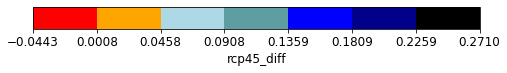

In [5]:
col_pr = ['red','orange','lightblue','cadetblue','blue','darkblue','black']

ipl_map = viz.plot_map(
    sites=df_pr,
    feature="rcp45_diff",
    colors=col_pr,
    colorbar_label="rcp45_diff",
    output_map_name="map.html",
)

ipl_map

# Histogram Plot

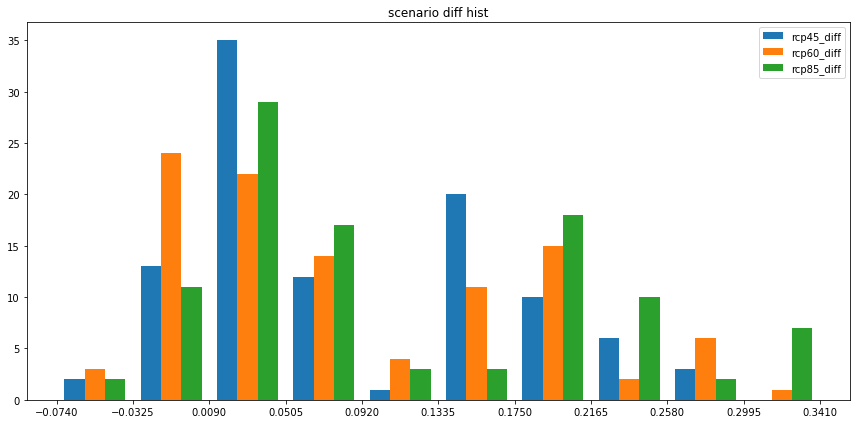

In [6]:
fig, ax = viz.plot_histogram(
    sites=df_pr,
    features=["rcp45_diff", "rcp60_diff", "rcp85_diff"],
    n_bins=10,
    plot_title="scenario diff hist",
)

plt.show()